<a href="https://colab.research.google.com/github/akshat-diwan/Classification_Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Done by**        - Akshat Diwan


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

df.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


<Axes: >

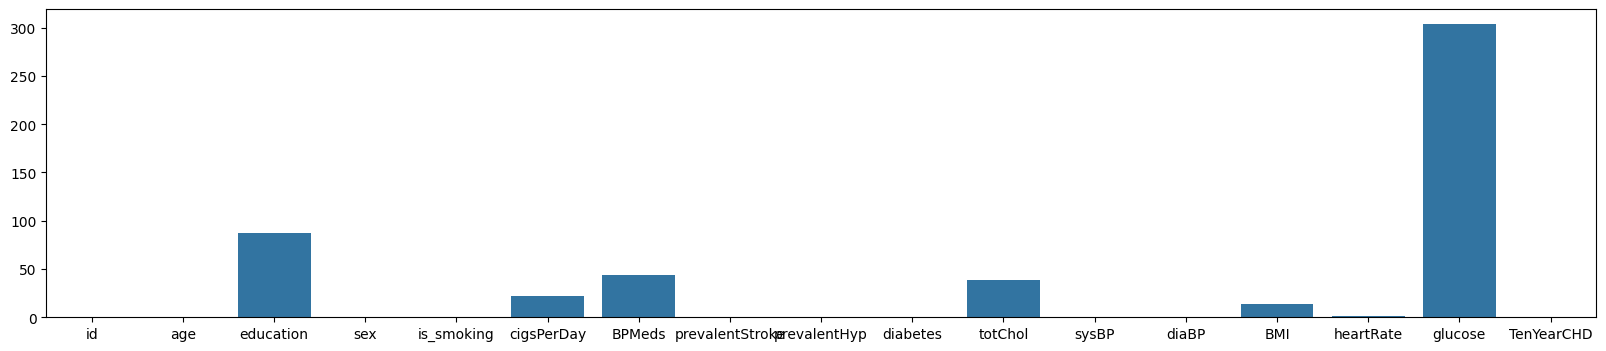

In [9]:
# Visualizing the missing values
plt.figure(figsize = (20,4))
sns.barplot(df.isnull().sum())

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in id is 3390
Number of unique values in age is 39
Number of unique values in education is 4
Number of unique values in sex is 2
Number of unique values in is_smoking is 2
Number of unique values in cigsPerDay is 32
Number of unique values in BPMeds is 2
Number of unique values in prevalentStroke is 2
Number of unique values in prevalentHyp is 2
Number of unique values in diabetes is 2
Number of unique values in totChol is 240
Number of unique values in sysBP is 226
Number of unique values in diaBP is 142
Number of unique values in BMI is 1259
Number of unique values in heartRate is 68
Number of unique values in glucose is 132
Number of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# mean cholestrol value

print('The mean cholestrol value in the dataset is : ',df['totChol'].mean())

The mean cholestrol value in the dataset is :  237.07428400954655


In [14]:
# highest bp of both types in the dataset

print("Highest Systolic Blood Pressure (sysBP):", df['sysBP'].max())
print("Highest Diastolic Blood Pressure (diaBP):", df['diaBP'].max())

Highest Systolic Blood Pressure (sysBP): 295.0
Highest Diastolic Blood Pressure (diaBP): 142.5


In [15]:
# value counts for smoking

df['is_smoking'].value_counts()

,count
is_smoking,
NO,1703
YES,1687


In [16]:
# value counts for gender

df['sex'].value_counts()

,count
sex,
F,1923
M,1467


In [64]:
# youngest person who smokes

df[df['is_smoking']=='YES']['age'].min()

32

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

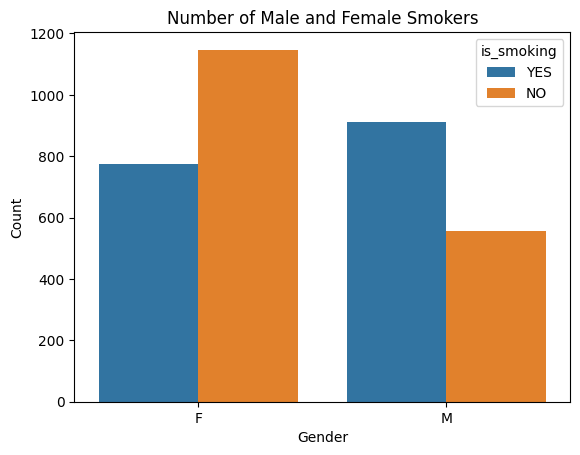

"\n\n*   Why did you pick the specific chart?\n    A countplot is suitable for visualizing the distribution of a categorical variable (gender) and comparing counts across another categorical variable (smoking status). It clearly shows the number of males and females who smoke or not smoke.\n\n*   What is/are the insight(s) found from the chart?\n    The chart shows the number of males and females in the dataset, broken down by whether they are smokers or non-smokers. We can see the absolute count of smokers and non-smokers for each gender.\n\n*   Will the gained insights help creating a positive business impact?\n    This initial visualization helps understand the distribution of smokers across genders, which can be important for targeted health campaigns or understanding risk factors associated with gender and smoking. It provides a baseline for further analysis on the relationship between gender and smoking behavior.\n\n* Are there any insights that lead to negative growth? Justify w

In [65]:
# prompt: visualize no. of male and female who smokes

import matplotlib.pyplot as plt
# Chart visualization code
sns.countplot(x='sex', hue='is_smoking', data=df)
plt.title('Number of Male and Female Smokers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
'''

*   Why did you pick the specific chart?
    A countplot is suitable for visualizing the distribution of a categorical variable (gender) and comparing counts across another categorical variable (smoking status). It clearly shows the number of males and females who smoke or not smoke.

*   What is/are the insight(s) found from the chart?
    The chart shows the number of males and females in the dataset, broken down by whether they are smokers or non-smokers. We can see the absolute count of smokers and non-smokers for each gender.

*   Will the gained insights help creating a positive business impact?
    This initial visualization helps understand the distribution of smokers across genders, which can be important for targeted health campaigns or understanding risk factors associated with gender and smoking. It provides a baseline for further analysis on the relationship between gender and smoking behavior.

* Are there any insights that lead to negative growth? Justify with specific reason.
    This visualization itself doesn't directly show negative growth. It simply presents the current state of the data regarding gender and smoking. However, if a significant portion of a particular gender is shown to be smokers, it indicates a potential health risk factor within that demographic that could lead to negative health outcomes. Further analysis is needed to understand the impact on cardiovascular risk.'''

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

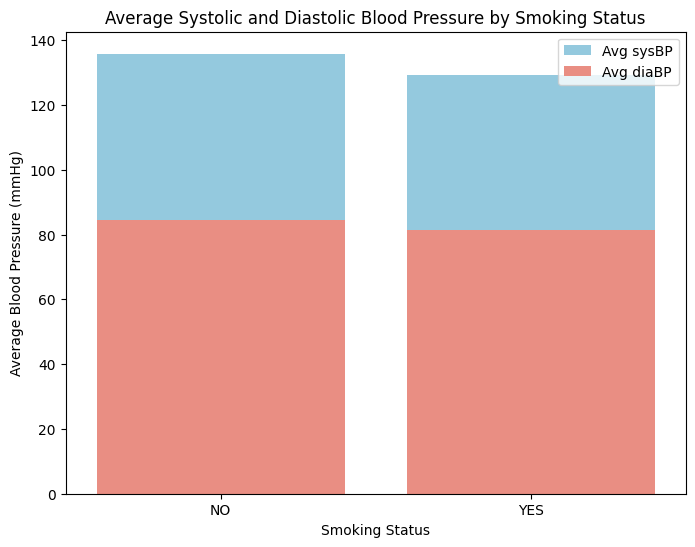

"\n*   Why did you pick the specific chart?\n    A grouped bar plot is effective for comparing the average values of two numerical variables (sysBP and diaBP) across different categories of a categorical variable (is_smoking). It allows for a clear visual comparison of blood pressure levels between smokers and non-smokers.\n\n*   What is/are the insight(s) found from the chart?\n    The chart clearly shows the average systolic and diastolic blood pressure for individuals who smoke and those who do not. We can visually compare if there is a difference in average blood pressure between the two groups. This helps to understand the potential impact of smoking on blood pressure.\n\n*   Will the gained insights help creating a positive business impact?\n    Identifying that smoking is associated with higher average blood pressure is a crucial insight for public health campaigns and medical interventions. This information can inform strategies to encourage smoking cessation and manage blood p

In [66]:
# prompt: avg sysBP and avg diaBP with respect to smoking yes and no

import matplotlib.pyplot as plt
# Chart visualization code
smoking_bp = df.groupby('is_smoking')[['sysBP', 'diaBP']].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='is_smoking', y='sysBP', data=smoking_bp, color='skyblue', label='Avg sysBP')
sns.barplot(x='is_smoking', y='diaBP', data=smoking_bp, color='salmon', label='Avg diaBP')
plt.title('Average Systolic and Diastolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.legend()
plt.show()

'''
*   Why did you pick the specific chart?
    A grouped bar plot is effective for comparing the average values of two numerical variables (sysBP and diaBP) across different categories of a categorical variable (is_smoking). It allows for a clear visual comparison of blood pressure levels between smokers and non-smokers.

*   What is/are the insight(s) found from the chart?
    The chart clearly shows the average systolic and diastolic blood pressure for individuals who smoke and those who do not. We can visually compare if there is a difference in average blood pressure between the two groups. This helps to understand the potential impact of smoking on blood pressure.

*   Will the gained insights help creating a positive business impact?
    Identifying that smoking is associated with higher average blood pressure is a crucial insight for public health campaigns and medical interventions. This information can inform strategies to encourage smoking cessation and manage blood pressure, potentially leading to improved cardiovascular health outcomes and reduced healthcare costs.

* Are there any insights that lead to negative growth? Justify with specific reason.
    The insight itself doesn't lead to negative growth, but rather highlights a factor (smoking) that is known to contribute to negative health outcomes like high blood pressure and increased cardiovascular risk. If the data shows significantly higher blood pressure among smokers, it reinforces the negative impact of smoking on health.
'''


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Average Cholesterol by Smoking Status:
  is_smoking     totChol
0         NO  239.187093
1        YES  234.928443


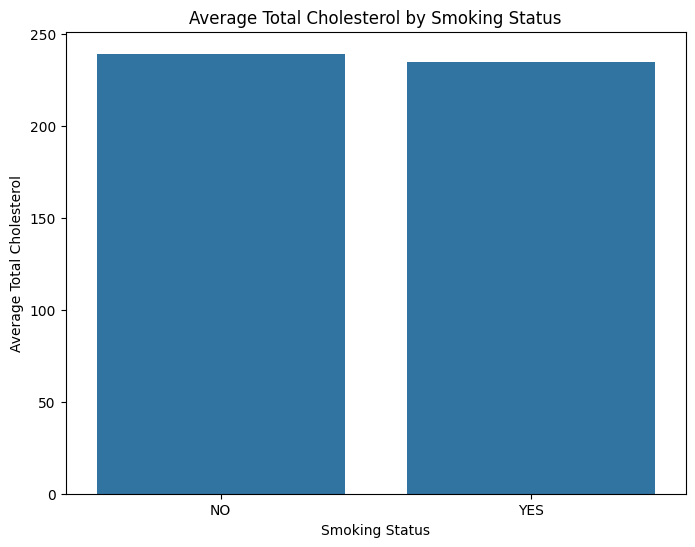

"\n*   Why did you pick the specific chart?\n    A bar chart is a simple and effective way to visualize and compare the average total cholesterol levels for two distinct groups (smokers and non-smokers). It provides a clear visual representation of any difference in mean cholesterol between these groups.\n\n*   What is/are the insight(s) found from the chart?\n    The chart shows the average total cholesterol level for individuals who smoke and those who do not. This allows us to see if there is a noticeable difference in average cholesterol based on smoking status. It can help to identify if smoking is associated with higher average cholesterol.\n\n*   Will the gained insights help creating a positive business impact?\n    If the data indicates that smokers have higher average cholesterol, this insight is valuable for public health initiatives aimed at reducing cardiovascular risk. High cholesterol is a significant risk factor, and showing its association with smoking can strengthen t

In [68]:
# prompt: avg cholestrol with smoking yes and no

import matplotlib.pyplot as plt
cholesterol_smoking = df.groupby('is_smoking')['totChol'].mean().reset_index()
print("Average Cholesterol by Smoking Status:")
print(cholesterol_smoking)

# Chart visualization code
plt.figure(figsize=(8, 6))
sns.barplot(x='is_smoking', y='totChol', data=cholesterol_smoking)
plt.title('Average Total Cholesterol by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Total Cholesterol')
plt.show()

'''
*   Why did you pick the specific chart?
    A bar chart is a simple and effective way to visualize and compare the average total cholesterol levels for two distinct groups (smokers and non-smokers). It provides a clear visual representation of any difference in mean cholesterol between these groups.

*   What is/are the insight(s) found from the chart?
    The chart shows the average total cholesterol level for individuals who smoke and those who do not. This allows us to see if there is a noticeable difference in average cholesterol based on smoking status. It can help to identify if smoking is associated with higher average cholesterol.

*   Will the gained insights help creating a positive business impact?
    If the data indicates that smokers have higher average cholesterol, this insight is valuable for public health initiatives aimed at reducing cardiovascular risk. High cholesterol is a significant risk factor, and showing its association with smoking can strengthen the message about the importance of not smoking for maintaining healthy cholesterol levels, leading to better health outcomes and potentially reduced healthcare costs.

* Are there any insights that lead to negative growth? Justify with specific reason.
    Similar to the blood pressure chart, the insight itself doesn't lead to negative growth but highlights a risk factor (smoking) that is associated with a condition (high cholesterol) that contributes to negative health outcomes like cardiovascular disease. If smokers have significantly higher average cholesterol, it underscores the negative health impact of smoking.
'''


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4


Average BMI by Smoking Status:
  is_smoking        BMI
0         NO  26.503738
1        YES  25.079440


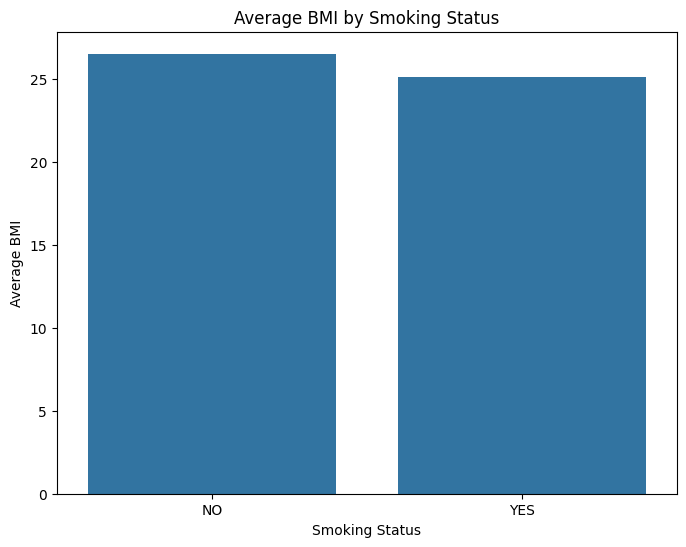

In [69]:
# prompt: avg bmi with respect to smoking yes and no

import matplotlib.pyplot as plt
# Average BMI by Smoking Status
bmi_smoking = df.groupby('is_smoking')['BMI'].mean().reset_index()
print("\nAverage BMI by Smoking Status:")
print(bmi_smoking)

# Chart visualization code
plt.figure(figsize=(8, 6))
sns.barplot(x='is_smoking', y='BMI', data=bmi_smoking)
plt.title('Average BMI by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average BMI')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [21]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [22]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [23]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [24]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [25]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [26]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [27]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [28]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [29]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [30]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [31]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [52]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***